# CWA Determination: XGB Best Model


## Authenticate to Colab

In [18]:
# AUTHENTICATE to Google Colab using your Colab credentials
from google.colab import auth
auth.authenticate_user()

## Mount GDrive

In [19]:
# IMPORT & MOUNT gDrive so we can access files from here
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import Python Packages

In [20]:
# install xgboost
!pip install xgboost

# install iterative stratification
!pip install iterative-stratification


In [21]:
import pandas as pd
from pandas import read_csv

import numpy as np
from numpy import isnan

# import pickle5 as pickle
import os
import random

import matplotlib.pyplot as plt

from collections import Counter

import time

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import seaborn as sns

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.pipeline import Pipeline

# from mlxtend.evaluate import bias_variance_decomp

from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

# Set the randomizer seed so results are the same each time.
np.random.seed(123)

pd.set_option('display.float_format', '{:.2f}'.format)

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

## Prepare Data

### Load Data

In [42]:
# Load Data

full_df = pd.read_csv(r"/content/drive/MyDrive/Colab/Data/2021.03.20_full_dataset.csv")



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,486) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Extract model data

In [43]:
# Extract relevant columns
model_data = full_df[[

                'cwa_determination',
                'da_number',
                'district',
                'latitude', 'longitude',
               'hydclprs', 
               'aws025wta',
               'slopegradd',
               'wtdepannmi',
               'flodfreqdc',
               'pondfreqpr',
               'wtdepaprju',
                
               'fl_areasqkm_sum_200m',
               'fl_gnis_name_ind_count_200m',
               'fl_totdasqkm_sum_200m',
               'fl_streamorde_sum_200m',
               'fl_startflag_sum_200m',
               'fl_divergence_mean_200m',
                
               'wb_area_sum_200m',
               'wb_gnis_name_ind_count_200m',
                
               'fl_areasqkm_sum_2500m',
               'fl_gnis_name_ind_count_2500m',
               'fl_totdasqkm_sum_2500m',
               'fl_flow_type_sum_2500m',
               'fl_streamorde_sum_2500m',
               'fl_intephem_mean_2500m',
               'fl_startflag_sum_2500m',
               'fl_divergence_mean_2500m',
                
               'wb_area_sum_2500m',
               'wb_gnis_name_ind_count_2500m',
                
                'elevation_mean_200m',
                'elevation_mean_2500m',
                'elevation_stdev_200m',
                'elevation_stdev_2500m',

                'fl_ftype_artificialpath_200m',
                'fl_ftype_artificialpath_2500m',
                'fl_ftype_canalditch_200m',
                'fl_ftype_canalditch_2500m',
                'fl_ftype_coastline_200m',
                'fl_ftype_coastline_2500m',
                'fl_ftype_connector_2500m',
                'fl_ftype_pipeline_2500m',
                'fl_ftype_streamriver_200m',
                'fl_ftype_streamriver_2500m',

                'wb_ftype_canalditch_200m',
                'wb_ftype_canalditch_2500m',
                'wb_ftype_connector_2500m',
                'wb_ftype_pipeline_200m',
                'wb_ftype_streamriver_2500m',

                'nwi_WATER_REGIME_NAME_artificially_flooded_2500m',
                'nwi_WATER_REGIME_NAME_continuously__saturated_2500m',
                'nwi_WATER_REGIME_NAME_intermittently_exposed_200m',
                'nwi_WATER_REGIME_NAME_intermittently_exposed_2500m',
                'nwi_WATER_REGIME_NAME_intermittently_flooded_2500m',
                'nwi_WATER_REGIME_NAME_irregularly_exposed_2500m',
                'nwi_WATER_REGIME_NAME_irregularly_flooded_200m',
                'nwi_WATER_REGIME_NAME_irregularly_flooded_2500m',
                'nwi_WATER_REGIME_NAME_permanently_flooded-tidal_200m',
                'nwi_WATER_REGIME_NAME_permanently_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_permanently_flooded_200m',
                'nwi_WATER_REGIME_NAME_permanently_flooded_2500m',
                'nwi_WATER_REGIME_NAME_regularly_flooded_200m',
                'nwi_WATER_REGIME_NAME_regularly_flooded_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded/saturated_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded_200m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_saturated_200m',
                'nwi_WATER_REGIME_NAME_seasonally_saturated_2500m',
                'nwi_WATER_REGIME_NAME_semipermanently_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_semipermanently_flooded_200m',
                'nwi_WATER_REGIME_NAME_semipermanently_flooded_2500m',
                'nwi_WATER_REGIME_NAME_subtidal_200m',
                'nwi_WATER_REGIME_NAME_subtidal_2500m',
                'nwi_WATER_REGIME_NAME_temporary_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_temporary_flooded_200m',
                'nwi_WATER_REGIME_NAME_temporary_flooded_2500m',
                'nwi_WATER_REGIME_NAME_zzz_200m',
                'nwi_WATER_REGIME_NAME_zzz_2500m',

                'nwi_CLASS_NAME_aquatic_bed_200m',
                'nwi_CLASS_NAME_aquatic_bed_2500m',
                'nwi_CLASS_NAME_emergent_200m',
                'nwi_CLASS_NAME_emergent_2500m',
                'nwi_CLASS_NAME_forested_200m',
                'nwi_CLASS_NAME_forested_2500m',
                'nwi_CLASS_NAME_reef_2500m',
                'nwi_CLASS_NAME_rocky_shore_2500m',
                'nwi_CLASS_NAME_scrub-shrub_200m',
                'nwi_CLASS_NAME_scrub-shrub_2500m',
                'nwi_CLASS_NAME_streambed_200m',
                'nwi_CLASS_NAME_streambed_2500m',
                'nwi_CLASS_NAME_unconsolidated_bottom_200m',
                'nwi_CLASS_NAME_unconsolidated_bottom_2500m',
                'nwi_CLASS_NAME_unconsolidated_shore_200m',
                'nwi_CLASS_NAME_unconsolidated_shore_2500m',
                'nwi_CLASS_NAME_zzz_2500m',

'slope_stdev_200m',
'transition_8_200m',
'seasonality_mean_200m',
'transition_0_200m',
'recurrence_min_200m',
'elevation_min_200m',
'seasonality_min_200m',
'transition_2_200m',
'slope_min_200m',
'transition_3_200m',
'seasonality_stdev_200m',
'slope_mean_200m',
'recurrence_mean_200m',
'transition_5_200m',
'transition_7_200m',
'elevation_mean_200m',
'slope_max_200m',
'elevation_max_200m',
'seasonality_max_200m',
'transition_6_200m',
'transition_4_200m',
'elevation_stdev_200m',
'transition_1_200m',
'recurrence_max_200m',
'recurrence_stdev_200m',
'transition_9_200m'
]].copy()

# Lat/Lon Feature Engineering
model_data['x_coord'] = np.cos(model_data['latitude']) * np.cos(model_data['longitude'])
model_data['y_coord'] = np.cos(model_data['latitude']) * np.sin(model_data['longitude'])
model_data['z_coord'] = np.sin(model_data['latitude'])

model_data.shape

(14619, 125)

### One hot encode categorical features

In [44]:
# One Hot Encode categorical variables
cat_cols = ['flodfreqdc']

for c in cat_cols:
  enc_df = pd.get_dummies(model_data[c], prefix='')
  model_data = model_data.join(enc_df)
  model_data.drop(c, axis=1, inplace=True)

model_data.shape

(14619, 130)

### Prepare X, Y

In [45]:
drop_cols = ['da_number', 'district', 'latitude', 'longitude', 'cwa_determination']

# for model data
Y = model_data[["cwa_determination"]]
X = model_data.copy()
X.drop(columns=drop_cols, inplace = True)

print(X.shape)
print(Y.shape)

# Impute nans 
for c in X.columns:
  X.fillna(value=X[c].mean(), inplace=True)


(14619, 125)
(14619, 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Data Split


In [46]:
# # Method 2 Stratified Shuffle Split

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, Y):
  X_train_set, X_test_set = X.iloc[train_index], X.iloc[test_index]
  Y_train_set, Y_test_set = Y.iloc[train_index], Y.iloc[test_index]


sss_train = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for index1, index2 in sss_train.split(X_train_set, Y_train_set):
  X_train1, X_train2 = X_train_set.iloc[index1], X_train_set.iloc[index2]
  Y_train1, Y_train2 = Y_train_set.iloc[index1], Y_train_set.iloc[index2]


sss_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for index1, index2 in sss_test.split(X_test_set, Y_test_set):
  X_test1, X_test2 = X_test_set.iloc[index1], X_test_set.iloc[index2]
  Y_test1, Y_test2 = Y_test_set.iloc[index1], Y_test_set.iloc[index2]

print(X_train_set.shape, Y_train_set.shape)
print(X_test_set.shape, Y_test_set.shape)
print(X_train1.shape, Y_train1.shape)
print(X_train2.shape, Y_train2.shape)
print(X_test1.shape, Y_test1.shape)
print(X_test2.shape, Y_test2.shape)

(10233, 125) (10233, 1)
(4386, 125) (4386, 1)
(5116, 125) (5116, 1)
(5117, 125) (5117, 1)
(2193, 125) (2193, 1)
(2193, 125) (2193, 1)


## Tune XGB

In [47]:
# Prepare data for cross val
metric = 'balanced_accuracy'
# metric = 'precision'
# metric = 'roc_auc'
# metric = 'recall'

# Impute X
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X_train_set)
X_train_imp = imputer.transform(X_train_set)

# Assign y
y_train = np.ravel(Y_train_set)

In [ ]:
# Fix learning rate and number of estimators : 'learning_rate': 0.2, 'n_estimators': 100
# Tune max_depth, min_child_weight : 'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)
# Tune gamma : 'gamma':[i/10.0 for i in range(0,5)]
# Tune sub_sample and col_sample : 'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]
# Tune regularization parameters : 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# Reduce learning rate : 0.1

# Tune for each of scoring = ['roc_auc', 'balanced_accuracy', 'precision']

In [48]:
# Tune max_depth, min_child_weight
cv_params = {'max_depth': [5,6,7,8], 'min_child_weight': [1,2]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = metric, cv = 5)
csv.fit(X_train_imp, y_train)
csv.best_params_

{'max_depth': 7, 'min_child_weight': 2}

In [50]:
# Tune gamma 
cv_params = {'gamma':[i/10.0 for i in range(0,5)]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 7, 'min_child_weight': 2}   
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = metric, cv = 5)
csv.fit(X_train_imp, y_train)
csv.best_params_

{'gamma': 0.0}

In [51]:
# Tune sub_sample and col_sample and max_delta_step
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2], 'colsample_bytree':[i/10.0 for i in range(6,10)]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = metric, cv = 5) 
csv.fit(X_train_imp, y_train)
csv.best_params_

{'colsample_bytree': 0.8, 'max_delta_step': 2, 'subsample': 0.8}

In [52]:
# Tune regularization parameters
cv_params = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 50]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0, 'colsample_bytree': 0.8, 'max_delta_step': 2, 'subsample': 0.8}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = metric, cv = 5)
csv.fit(X_train_imp, y_train)
csv.best_params_

{'reg_alpha': 1e-05}

In [53]:
# Tune learning rate
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params = {'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0, 'colsample_bytree': 0.8, 'max_delta_step': 2, 'subsample': 0.8, 'reg_alpha': 0}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = metric, cv = 5) 
csv.fit(X_train_imp, y_train)
csv.best_params_

{'learning_rate': 0.2}

## Model Parameters

In [ ]:
# parameters for max. balanced_accuracy

model = XGBClassifier(objective='binary:logistic',
                       booster='gbtree',
                       n_estimators=1000,
                       max_depth=7,
                       min_child_weight=2,
                       gamma=0,
                       colsample_bytree=0.8,
                       max_delta_step=2,
                       subsample=0.8,
                       reg_alpha=0,
                       learning_rate=0.2,
                       seed=27,
                       eval_metric='error'
                       ) 

## Train XGB

In [60]:
# Impute X_train
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X_train_set)
X_train_imp = imputer.transform(X_train_set)

# Assign y
y_train = np.ravel(Y_train_set)

# Instantiate model
model = XGBClassifier()

# Train model
model.fit(X_train_imp, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predict unseen

XGBoost Model


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2765
           1       0.70      0.58      0.64      1621

    accuracy                           0.75      4386
   macro avg       0.74      0.72      0.72      4386
weighted avg       0.75      0.75      0.75      4386

Balanced Accuracy Score: 71.76%
AUC: 0.718 




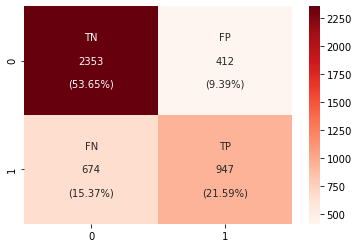

In [40]:
# Impute X_test
X_test_imp = imputer.transform(X_test_set)

# Assign y
y_test = np.ravel(Y_test_set)

# Predict 
y_pred = model.predict(X_test_imp)
y_pred_proba = model.predict_proba(X_test_imp)

print("XGBoost Model\n")

# print classification report
cr = metrics.classification_report(y_test, y_pred, digits=2)
print("\nClassification Report:\n",)
print(cr)

# print accuracy score
bas = metrics.balanced_accuracy_score(y_test, y_pred)*100
print("Balanced Accuracy Score: %.2f%%" % (bas))

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc, "\n\n")

# Generate pretty Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# tn = cm.flatten()[0]
# fp = cm.flatten()[1]
# fn = cm.flatten()[2]
# tp = cm.flatten()[3]
# print(tn, fp, fn, tp)

# ###
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]          
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Reds')


## Evaluate model

In [61]:
scoring_metrics = ['accuracy', 'balanced_accuracy', 'roc_auc', 'precision', 'recall']

# CV roc_auc
scores = cross_val_score(model, X_test_imp, y_test, cv=10, scoring='roc_auc')
print("%0.2f roc_auc with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# CV balanced_accuracy
scores = cross_val_score(model, X_test_imp, y_test, cv=10, scoring='balanced_accuracy')
print("%0.2f balanced_accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# CV positive predictive value
scores = cross_val_score(model, X_test_imp, y_test, cv=10, scoring='precision')
print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 roc_auc with a standard deviation of 0.02
0.68 balanced_accuracy with a standard deviation of 0.03
0.73 precision with a standard deviation of 0.05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


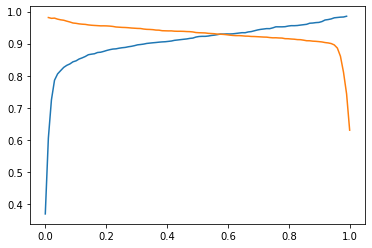

In [58]:

y_predict_proba = model.predict_proba(X_test_imp)[:, 1]
y_true = y_test
ppv = []
npv = []
th_list = np.linspace(0, 1, 100)
for th in th_list:
    y_predict = 1 * (y_predict_proba > th)
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict).ravel()
    ppv_ = tp / (tp + fp) 
    npv_ = tn / (fn + tn)
    ppv.append(ppv_)
    npv.append(npv_)
ppv_array = np.array(ppv)
npv_array = np.array(npv)
th_array = np.array(th_list)
plt.plot(th_array, ppv_array)
plt.plot(th_array, npv_array)

In [57]:
def ppv_npv_opt_th(y_true=np.array([1,0,1]), y_predict_proba=np.array([0.5, 0.25, 0.3])):
    """
    Inputs: y_true labels and prediction scores
    Outputs: optimized positive predictive value and negative predictive values per this reference
    https://arxiv.org/pdf/2007.05073.pdf
    """
    min_ppv_npv_list = []
    th_list = np.linspace(0, 1, 100)
    for th in th_list:
        y_predict = 1 * (y_predict_proba > th)
        tn, fp, fn, tp = confusion_matrix(y_true, y_predict).ravel()
        ppv = tp / (tp + fp) 
        npv = tn / (fn + tn)
        min_ppv_npv = np.min(np.nan_to_num(np.array((ppv, npv))))
        min_ppv_npv_list.append(min_ppv_npv)
    max_ppv_npv = np.nanmax(np.array(min_ppv_npv_list))
    opt_th_index = np.array(min_ppv_npv_list).argmax(axis=0)
    opt_th = th_list[opt_th_index]
    opt_y_predict = 1 * (y_predict_proba > opt_th)
    opt_tn, opt_fp, opt_fn, opt_tp = confusion_matrix(y_true, opt_y_predict).ravel()
    opt_ppv = opt_tp / (opt_tp + opt_fp) 
    opt_npv = opt_tn / (opt_fn + opt_tn)
    return opt_ppv, opt_npv, round(opt_th, 4)
ppv_npv_opt_th(y_test, y_predict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


(1.0, 1.0, 0.2525)

# APPENDIX

In [ ]:
# categorical variables in a df
cat_var = [key for key in dict(model_data.dtypes)
             if dict(model_data.dtypes)[key] in ['object'] ] # Categorical Varible

cat_var

In [ ]:
# estimate bias and variance
mse, bias, var = bias_variance_decomp(clf, X_train.to_numpy(), y_train, X_test.to_numpy(), y_test, loss='mse', random_seed=1)

# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

In [ ]:
# generate PPV of positive class
y_test = np.ravel(Y_test)
ppv = cross_val_score(model2, X_test, y_test, cv=10, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

In [ ]:
# How to impute Nans at training time

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train)

# Impute our data, then train
X_train_imp = imputer.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, Y_train)

for X_test in [X_test_1, X_test_2, X_test_3]:
    # Impute each test item, then predict
    X_test_imp = imputer.transform(X_test)
    print(X_test, '->', clf.predict(X_test_imp))



# Imputing with mean value
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=80)



# # Impute nans 
# for c in X.columns:
#   # X.fillna(value=X[c].mean(), inplace=True)
#   # X.fillna(value=X[c].mode()[0], inplace=True)

In [ ]:
# Using isna() to select all rows with NaN under a single DataFrame column:
df[df['column name'].isna()]

# Using isnull() to select all rows with NaN under a single DataFrame column:
df[df['column name'].isnull()]

# Using isna() to select all rows with NaN under an entire DataFrame:
df[df.isna().any(axis=1)]

# Using isnull() to select all rows with NaN under an entire DataFrame:
df[df.isnull().any(axis=1)]

In [ ]:
# sorting by date
df["date_col"] = pd.to_datetime(df["date_col"])
df = df.sort_values(by="date_col")

In [ ]:
# code for joe
df = X_hold_out
tmp = df.merge(model_data, how='left', left_on=df.index, right_on=model_data.index)
da_list = tmp[['da_number']]
da_list.to_csv(r"/content/drive/MyDrive/Colab/altmodel/hold_out.csv ")

In [ ]:
# hold-out by district
# d = "Chicago"

# # district list
# arr = full_df['district'].unique()
# new_arr = np.delete(arr, np.where(arr == d))

# # Extract model data
# model_data = model_data_tmp[model_data_tmp.district.isin(new_arr)].copy()
# model_data.reset_index(drop=True, inplace=True)

# # Extract hold_out dataset
# hold_out = model_data_tmp[model_data_tmp.district.isin([d])].copy()
# hold_out.reset_index(drop=True, inplace=True)

# # Prepare list of cols to be dropped, for later use
# drop_cols = ['da_number', 'district', 'latitude', 'longitude', 'cwa_determination']

# print(model_data_tmp.shape[0])
# print(model_data.shape[0])
# print(hold_out.shape[0])

In [ ]:
# hold-out by chronological separation

# model_data_tmp['date_issued_or_denied'] = pd.to_datetime(model_data_tmp['date_issued_or_denied'])
# model_data_tmp.sort_values(by='date_issued_or_denied', inplace=True)
# model_data_tmp.reset_index(drop=True, inplace=True)

# total = model_data_tmp.shape[0]
# n1 = total-2000

# # Extract model data
# model_data = model_data_tmp.head(n1)
# model_data.reset_index(drop=True, inplace=True)

# # Extract hold_out dataset
# hold_out = model_data_tmp.tail(2000)
# # hold_out.reset_index(drop=True, inplace=True)

# # Prepare list of cols to be dropped, for later use
# drop_cols = ['date_issued_or_denied', 'da_number', 'district', 'latitude', 'longitude', 'cwa_determination']

# print(model_data_tmp.shape[0])
# print(model_data.shape[0])
# print(hold_out.shape[0])


In [ ]:
# Downsample majority class

# define undersample strategy method 1
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_under, Y_under = undersample.fit_resample(X, Y)

X = pd.DataFrame(X_under, columns = X.columns)
Y = pd.DataFrame(Y_under, columns = Y.columns)

print(X.shape)
print(Y.shape)
print(Y.value_counts())


## Downsample majority class

In [ ]:
# Downsample majority class

# define undersample strategy method 1
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_under, Y_under = undersample.fit_resample(X_train_set, Y_train_set)

X_train_set = pd.DataFrame(X_under, columns = X.columns)
Y_train_set = pd.DataFrame(Y_under, columns = Y.columns)

print(X_train_set.shape)
print(Y_train_set.shape)
print(Y_train_set.value_counts())

(10806, 99)
(10806, 1)
cwa_determination
1                    5403
0                    5403
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Model Params

In [ ]:
test1 = XGBClassifier(objective='binary:logistic',
                       booster='gbtree',
                       learning_rate=0.1,
                       n_estimators=1000,
                       max_depth=6,
                       min_child_weight=1,
                       gamma=0,
                       subsample=1,
                       colsample_bytree=1,
                       reg_lambda=0,
                       reg_alpha=0,
                       seed=27,
                       eval_metric='error'
                       ) 

test2 = XGBClassifier(objective='binary:logistic',
                       booster='gbtree',
                       learning_rate=0.1,
                       n_estimators=1500,
                       max_depth=6,
                       min_child_weight=0.8,
                       gamma=0,
                       subsample=0.8,
                       colsample_bytree=1,
                       reg_lambda=1,
                       reg_alpha=1,
                       seed=27,
                       eval_metric='error'
                       ) 




# TEST

## Combined Data Train1 plus Train 2

XGBoost Model


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.85      0.81       830
           1       0.70      0.60      0.65       486

    accuracy                           0.76      1316
   macro avg       0.74      0.73      0.73      1316
weighted avg       0.75      0.76      0.75      1316

Balanced Accuracy Score: 72.54%
AUC: 0.725 




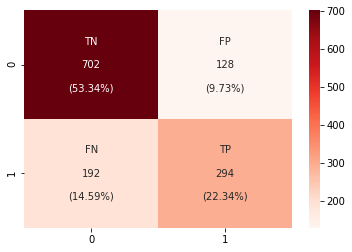

In [ ]:
# MODEL 1 - XGB

# Impute 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X_train_set)
X_train_imp = imputer.transform(X_train_set)

# Assign y
y_train = np.ravel(Y_train_set)

# Instantiate model
model = XGBClassifier(
 booster='gbtree',
 silent=0,
 learning_rate=0.1,
 n_estimators=1500,
 max_depth=6,
 min_child_weight=0.8,
 gamma=0, #0
 subsample=0.8,
 colsample_bytree=1, 
 nthread=4,
 scale_pos_weight=1,
 reg_lambda=1,
 objective='binary:logistic',
 seed=27,
 eval_metric='error'
 ) 

# Train 
model.fit(X_train_imp, y_train)

# Impute 
X_test_imp = imputer.transform(X_test)

# Assign y
y_test = np.ravel(Y_test)

# Predict 
y_pred = model.predict(X_test_imp)
y_pred_proba = model1.predict_proba(X_test_imp)


print("XGBoost Model\n")

# print classification report
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print(metrics.classification_report(y_test, y_pred, digits=2))

# print accuracy score
print("Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_test, y_pred)*100))

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc, "\n\n")

# Generate pretty Confusion Matrix
result = confusion_matrix(y_test, y_pred)
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

In [ ]:
ppv = cross_val_score(model, X_test_imp, y_test, cv=10, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

0.70 accuracy with a standard deviation of 0.03


In [ ]:
# ppv = cross_val_score(model, X_test_imp, y_test, cv=10, scoring='precision')
print("%0.2f precision with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

0.62 precision with a standard deviation of 0.05
